# Testing Saving and Loading Salient Regions

This notebook tests the saving and loading of the salient regions

In [1]:
# setup
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))
from pprint import pprint

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


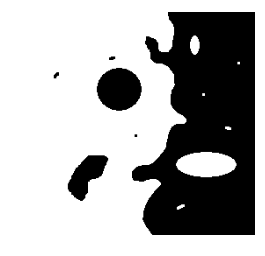

In [3]:
# load the test image
testdata_images_path = '../tests/images/Binary/'
testdata_features_path = '../tests/features/Binary/'

image = cv2.imread(os.path.join(testdata_images_path, 'Binary_all_types_noise.png'), cv2.IMREAD_GRAYSCALE)
sr.show_image(image)

In [4]:
# load MATLAB SE and set up parameters and detector
SE = sio.loadmat(os.path.join(testdata_features_path,"SE_all.mat"))['SE_n']
lam = 50
area_factor = 0.05
connectivity = 4
binarydetector = sr.BinaryDetector(SE=SE, lam=lam, area_factor=area_factor, 
                                                connectivity=connectivity)


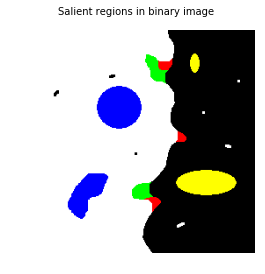

In [5]:
# run detector
regions = binarydetector.detect(image, find_holes=True, find_islands=True,
       find_indentations=True, find_protrusions=True, visualize=True)


In [6]:
# find the equivalent ellipses (both using standard and polynimial coefficients)
num_regions, features_standard, features_poly = sr.binary_mask2ellipse_features(regions, min_square=False)
print("Total number of regions detected: ", sum(num_regions.values()))
print("Number of features per saliency type: ", num_regions)
#sr.visualize_ellipses(regions["holes"], features_standard["holes"])
#sr.visualize_ellipses(regions["islands"], features_standard["islands"])
#sr.visualize_ellipses(regions["indentations"], features_standard["indentations"])
#sr.visualize_ellipses(regions["protrusions"], features_standard["protrusions"])
#sr.visualize_elements_ellipses(image, features_standard);

Total number of regions detected:  dict_values([2, 2, 3, 2])
Number of features per saliency type:  {'holes': 2, 'islands': 2, 'protrusions': 3, 'indentations': 2}


In [11]:
# print the feature representations
print("Elliptic standard features: \n")
pprint(features_standard) 
print("\n Elliptic polynomial features: \n")
pprint(features_poly)

Elliptic standard features: 

{'holes': array([[  64.16392517,  186.19673157,   14.        ,   29.        ,
          -0.93971696,    1.        ],
       [ 101.        ,   89.        ,   24.        ,   25.        ,
           3.14159265,    1.        ]]),
 'indentations': array([[  1.26830780e+02,   1.85146149e+02,   9.00000000e+00,
          1.10000000e+01,  -1.24355000e-01,   3.00000000e+00],
       [  1.42136993e+02,   4.58013725e+01,   1.90000000e+01,
          9.00000000e+00,  -7.48378094e-01,   3.00000000e+00]]),
 'islands': array([[ 200.        ,  175.        ,   14.        ,   34.        ,
           3.14159265,    2.        ],
       [ 187.        ,   38.5       ,   10.        ,    5.        ,
           3.14159265,    2.        ]]),
 'protrusions': array([[ 140.4133606 ,  197.19857788,    8.        ,    7.        ,
          -0.57133754,    4.        ],
       [ 172.16401672,  123.34799957,    5.        ,    5.        ,
          -1.39094281,    4.        ],
       [ 153.5   

In [12]:
# save the ellipsies in txt files
filename_standard = (os.path.join(testdata_features_path,'features_standard.txt'))
total_num_regions = sr.save_ellipse_features2file(num_regions, features_standard, filename_standard)
print("Total_num_regions (standard)", total_num_regions)
filename_poly = (os.path.join(testdata_features_path,'features_poly.txt'))
total_num_regions = sr.save_ellipse_features2file(num_regions, features_poly, filename_poly)
print("Total_num_regions (poly)", total_num_regions)


Total_num_regions (standard) 9
Total_num_regions (poly) 9


In [13]:
# loading the ellipses from the txt files
total_num_regions, num_regions, features_standard_loaded = sr.load_ellipse_features_from_file(filename_standard)
print("Features standard: ")
print("Total_num_regions: ", total_num_regions)
print("Number of features per saliency type: ", num_regions)

total_num_regions, num_regions, features_poly_loaded = sr.load_ellipse_features_from_file(filename_poly)
print("\n Features standard: ")
print("Total_num_regions: ", total_num_regions)
print("Number of features per saliency type: ", num_regions)

Features standard: 
Total_num_regions:  9
Number of features per saliency type:  {'holes': 2, 'islands': 2, 'protrusions': 3, 'indentations': 2}

 Features standard: 
Total_num_regions:  9
Number of features per saliency type:  {'holes': 2, 'islands': 2, 'protrusions': 3, 'indentations': 2}


In [16]:
#comapre the loaded ellipses with the original ones
print("Comparing the original standard and the loaded features: \n")
if all(features_standard[k]==features_standard_loaded[k] for k in features_standard):
    print("The same! \n")
else:
    print("Different! \n")

print("Comparing the original polynomial and the loaded features: \n")
if all(features_poly[k]==features_poly_loaded[k] for k in features_poly):
    print("The same! \n")
else:
    print("Different! \n")


Comparing the original standard and the loaded features: 

The same! 

Comparing the original polynomial and the loaded features: 

The same! 



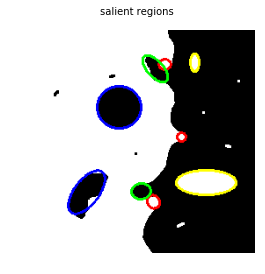

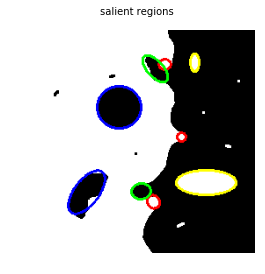

In [17]:
# visualise the original and the  loaded (only standard is supported!)
sr.visualize_elements_ellipses(image, features_standard);
sr.visualize_elements_ellipses(image, features_standard_loaded);
#sr.visualize_elements_ellipses(image, features_poly);